In [5]:
import numpy as np
import cv2
import pyvista as pv
import os

In [6]:
# TODO: Define directories and file names
origin_dir = 'E:\OneDrive\OneDrive - University of Cambridge\Documents\Coding\DPS_hku\data_new_65536\Origin'
label_dir = 'E:\OneDrive\OneDrive - University of Cambridge\Documents\Coding\DPS_hku\data_new_65536\Label'
file_name = '000101' 
# output_dir  = '/home/Liting/ruitong/SAM_2P3D/viewpt_images'

In [7]:
origin_mesh_path = os.path.join(origin_dir, f"{file_name}_origin.ply")
label_mesh_path = os.path.join(label_dir, f"{file_name}.ply")

origin_mesh = pv.read(origin_mesh_path)
label_mesh = pv.read(label_mesh_path)

FileNotFoundError: File (E:\OneDrive\OneDrive - University of Cambridge\Documents\Coding\DPS_hku\data_new_65536\Origin\000101_origin.ply) not found

In [4]:
# Extract original vertex colors of the origin mesh
vrgb_origin = origin_mesh.point_data['RGB']
print(vrgb_origin.shape) # (n_vertices, 3)

(33603, 3)


In [5]:
# Extract the mask from the vertex colors of the label mesh
vrgb_label = np.array(label_mesh.point_data['RGB'])/255.0 # normalize to [0, 1]
mask_label = np.all(vrgb_label == [0, 0, 0], axis=1).astype(int)  # 1 for plaque: black, 0 for non-plaque


In [6]:
# Define the camera parameters for each view
def setup_camera(view):
    camera = pv.Camera()
    if view == 'outer':
        camera.position = (0, 0, 200)  # Front view FIXME:???
        camera.focal_point = (0, 0, 0)
    elif view == 'inner':
        camera.position = (0, 0, -200)  # Back view FIXME:???
        camera.focal_point = (0, 0, 20)
    elif view == 'upper':
        camera.position = (0, 100, 0)  # Top-down view
        camera.focal_point = (0, 0, 0)
    elif view == 'left_outer':
        camera.position = (-150, 0, 0)  # Left view from outside
        camera.focal_point = (0, 0, 0)
    elif view == 'right_outer':
        camera.position = (150, 0, 0)  # Right view from outside
        camera.focal_point = (0, 0, 0)
    # elif view == 'left_inner':
    #     camera.position = (-100, 0, 0)  # Left view from inside
    #     camera.focal_point = (0, 0, 0)
    # elif view == 'right_inner':
    #     camera.position = (100, 0, 0)  # Right view from inside
    #     camera.focal_point = (0, 0, 0)
    camera.up = (0, 0, 1)  # Ensure the up direction is correct
    return camera

In [7]:
# Function to project the mesh vertices to 2D image using a camera view and save both original and mask images
def project_and_save_images(origin_mesh, label_mesh, camera, vrgb_origin, vrgb_label, view_name, image_size=(500, 500)):
    # Create the plotter and add the mesh
    plotter = pv.Plotter(off_screen=True)
    origin_mesh.point_data['RGB'] = vrgb_origin
    print(origin_mesh.point_data['RGB'].shape)
    plotter.add_mesh(origin_mesh, scalars=vrgb_origin, rgb=True, lighting=True) # FIXME: lighting=True or False
    plotter.camera = camera
    # Save the original image
    original_image_path = f'{view_name}_origin.png'
    plotter.show(screenshot=original_image_path)
    # Read the screenshot
    original_image = cv2.imread(original_image_path)
    original_image = cv2.resize(original_image, image_size)
    
    # Create the plotter for mask and add the mesh with mask scalars
    label_mesh.point_data['mask_color'] = vrgb_label
    plotter = pv.Plotter(off_screen=True)
    plotter.add_mesh(label_mesh, scalars='mask_color', rgb=True, lighting=True) # FIXME: lighting=True or False
    plotter.camera = camera
    # Save the mask image
    mask_image_path = f'{view_name}_label.png'
    plotter.show(screenshot=mask_image_path)
    mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)
    mask_image = cv2.resize(mask_image, image_size)
    
    return original_image, mask_image


In [8]:
# Set up cameras for each view
views = ['front', 'back', 'upper', 'left_outer', 'right_outer']
cameras = {view: setup_camera(view) for view in views}


(33603, 3)


e:\anaconda3\envs\DPS_env\lib\site-packages\pyvista\jupyter\notebook.py:59: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  f'Failed to use notebook backend: \n\n{e}\n\nFalling back to a static output.'


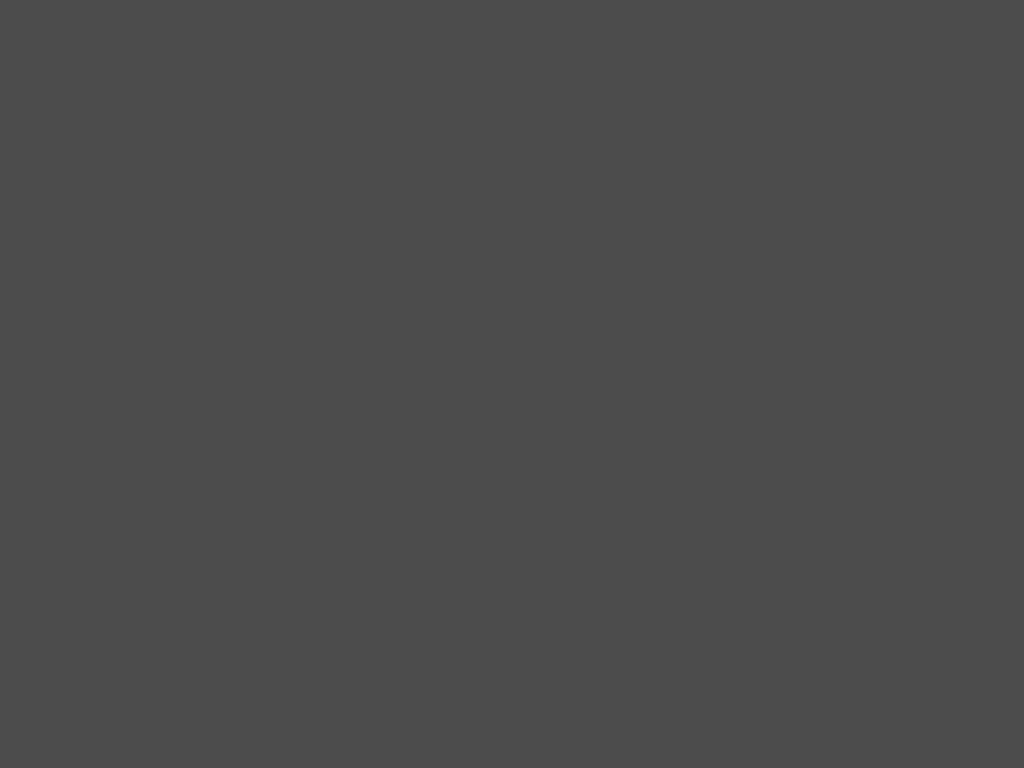

e:\anaconda3\envs\DPS_env\lib\site-packages\pyvista\jupyter\notebook.py:59: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  f'Failed to use notebook backend: \n\n{e}\n\nFalling back to a static output.'


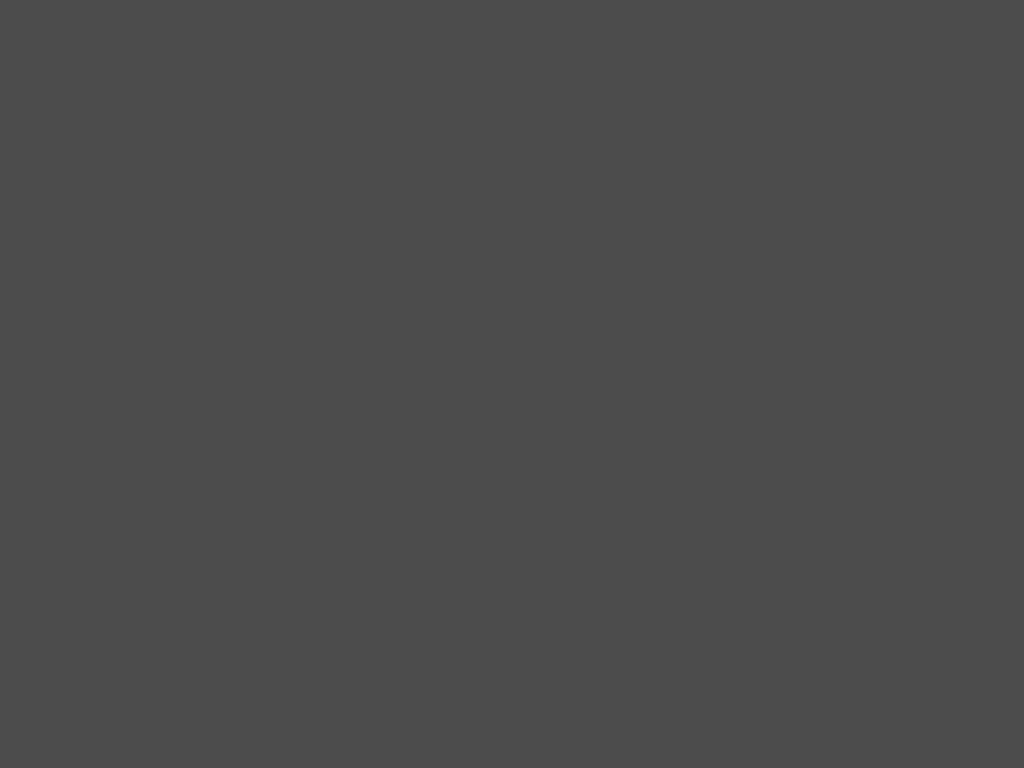

e:\anaconda3\envs\DPS_env\lib\site-packages\pyvista\jupyter\notebook.py:59: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  f'Failed to use notebook backend: \n\n{e}\n\nFalling back to a static output.'


(33603, 3)


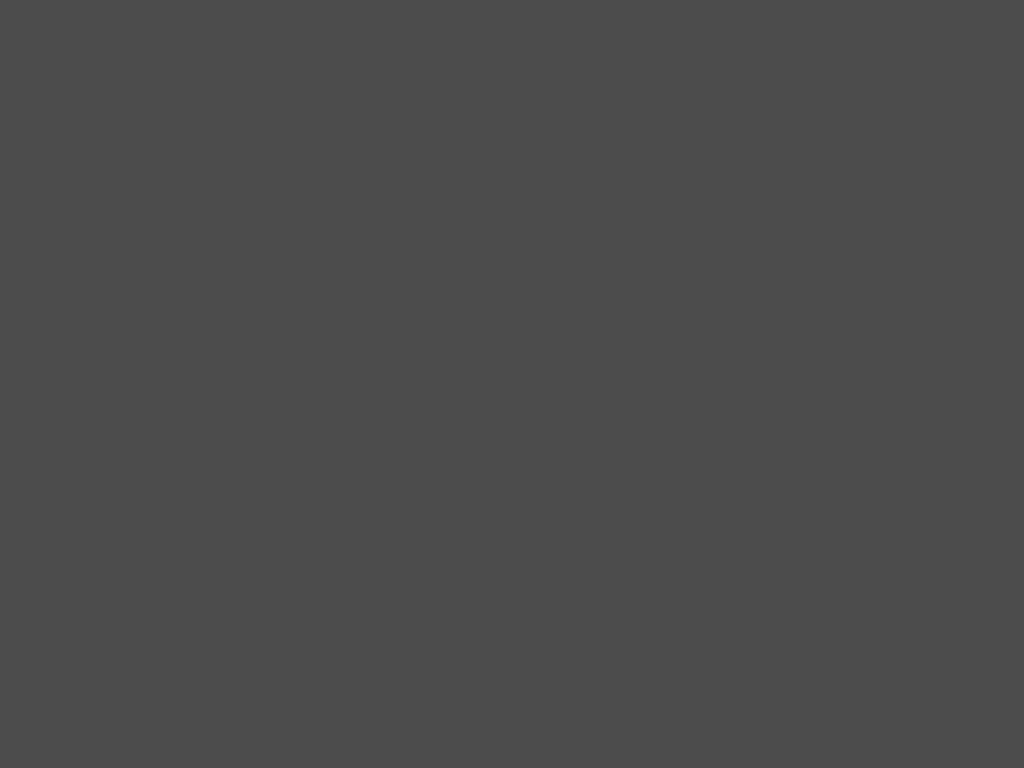

e:\anaconda3\envs\DPS_env\lib\site-packages\pyvista\jupyter\notebook.py:59: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  f'Failed to use notebook backend: \n\n{e}\n\nFalling back to a static output.'


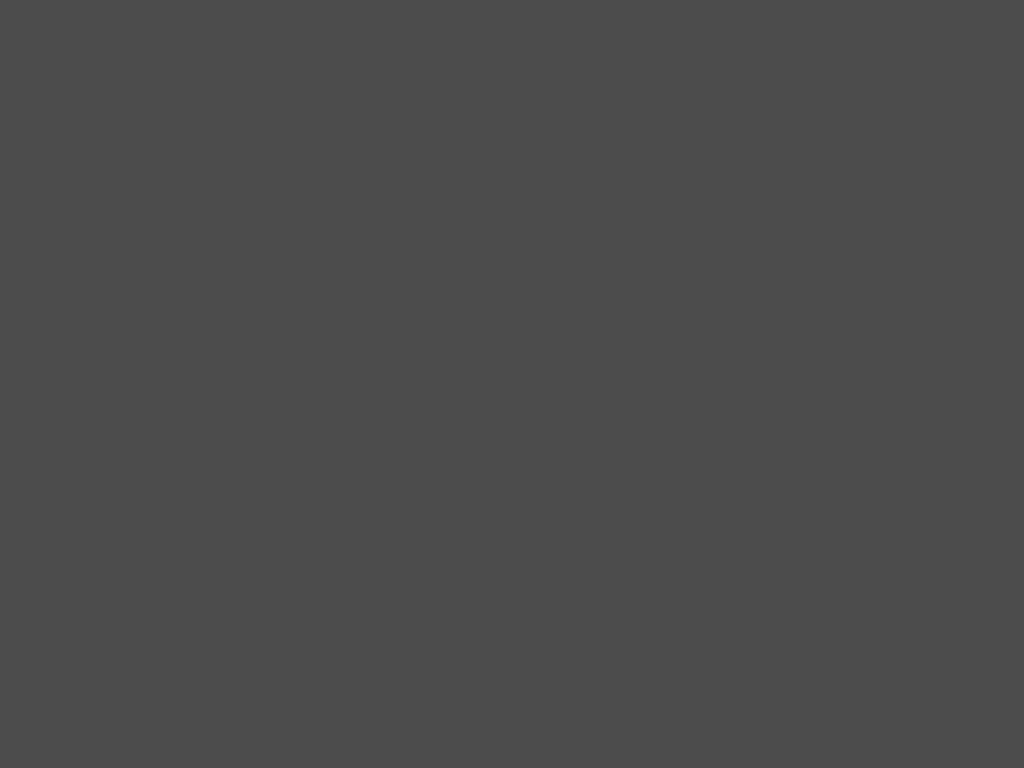

e:\anaconda3\envs\DPS_env\lib\site-packages\pyvista\jupyter\notebook.py:59: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  f'Failed to use notebook backend: \n\n{e}\n\nFalling back to a static output.'


(33603, 3)


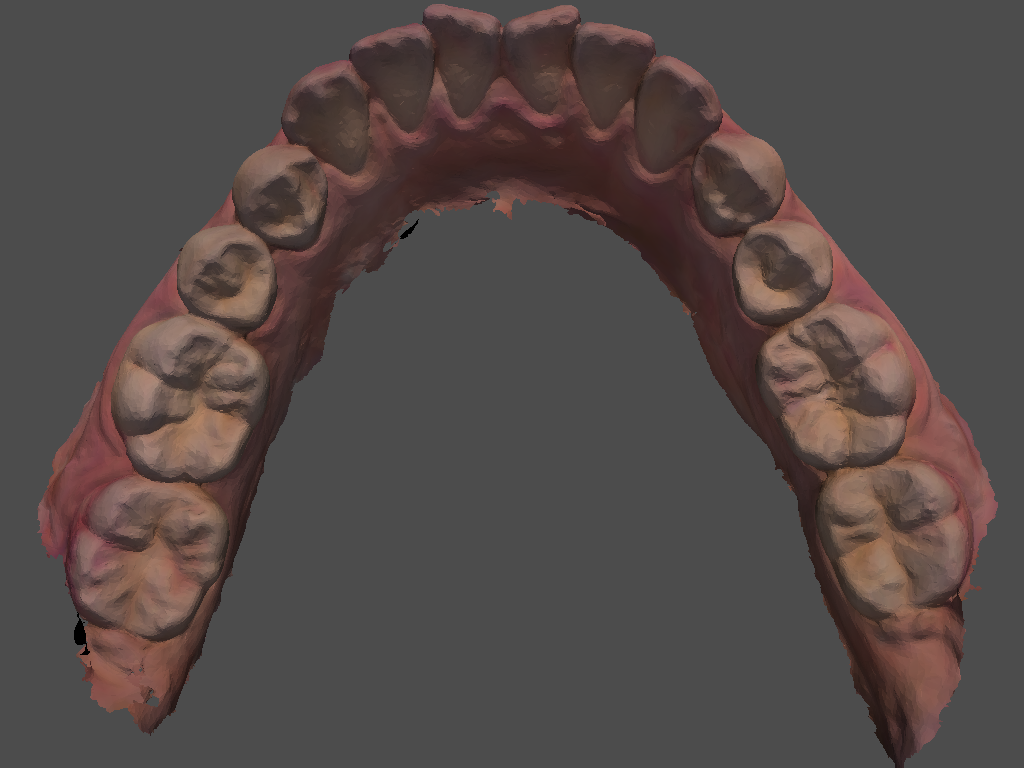

e:\anaconda3\envs\DPS_env\lib\site-packages\pyvista\jupyter\notebook.py:59: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  f'Failed to use notebook backend: \n\n{e}\n\nFalling back to a static output.'


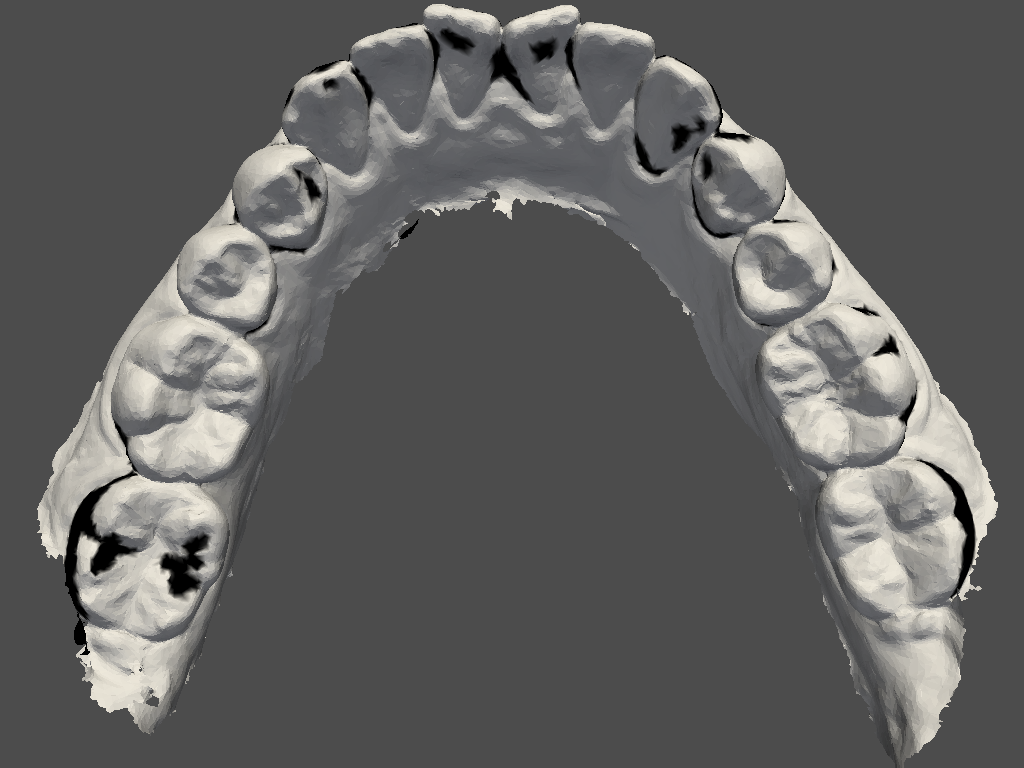

(33603, 3)


e:\anaconda3\envs\DPS_env\lib\site-packages\pyvista\jupyter\notebook.py:59: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  f'Failed to use notebook backend: \n\n{e}\n\nFalling back to a static output.'


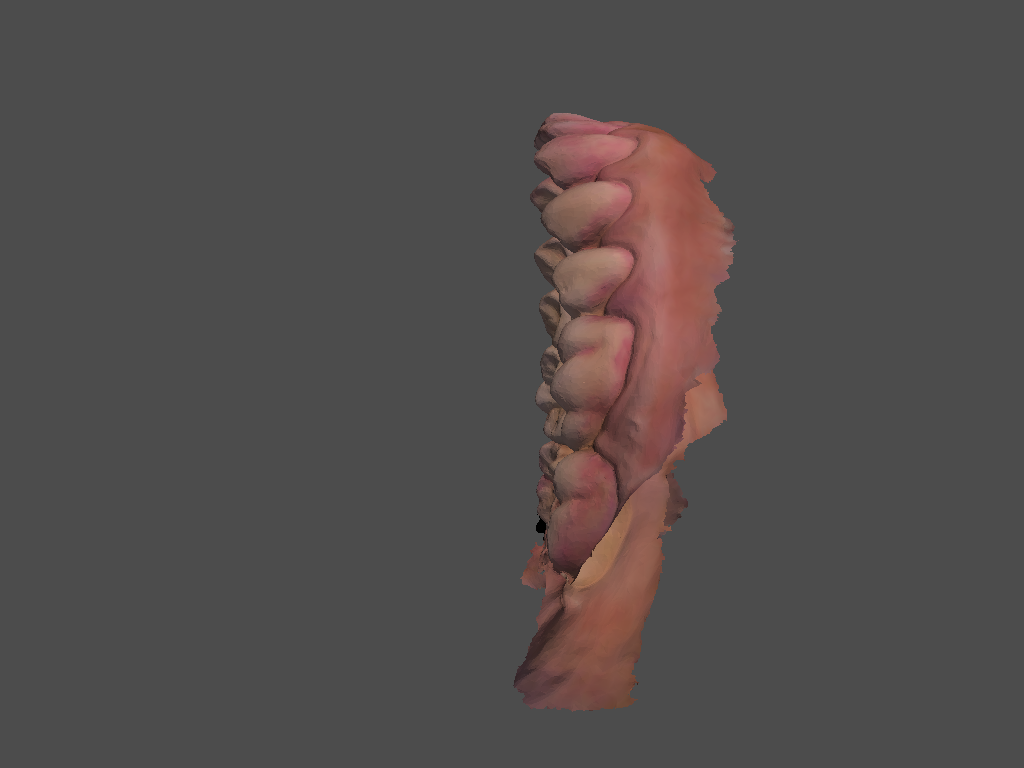

e:\anaconda3\envs\DPS_env\lib\site-packages\pyvista\jupyter\notebook.py:59: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  f'Failed to use notebook backend: \n\n{e}\n\nFalling back to a static output.'


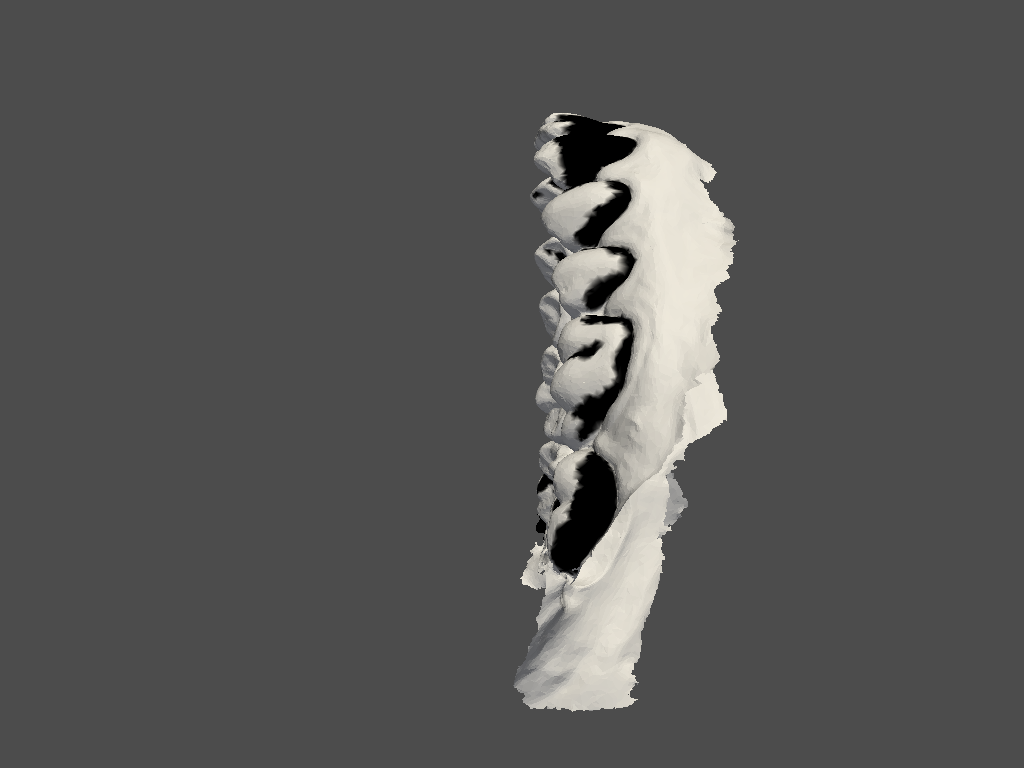

(33603, 3)


e:\anaconda3\envs\DPS_env\lib\site-packages\pyvista\jupyter\notebook.py:59: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  f'Failed to use notebook backend: \n\n{e}\n\nFalling back to a static output.'


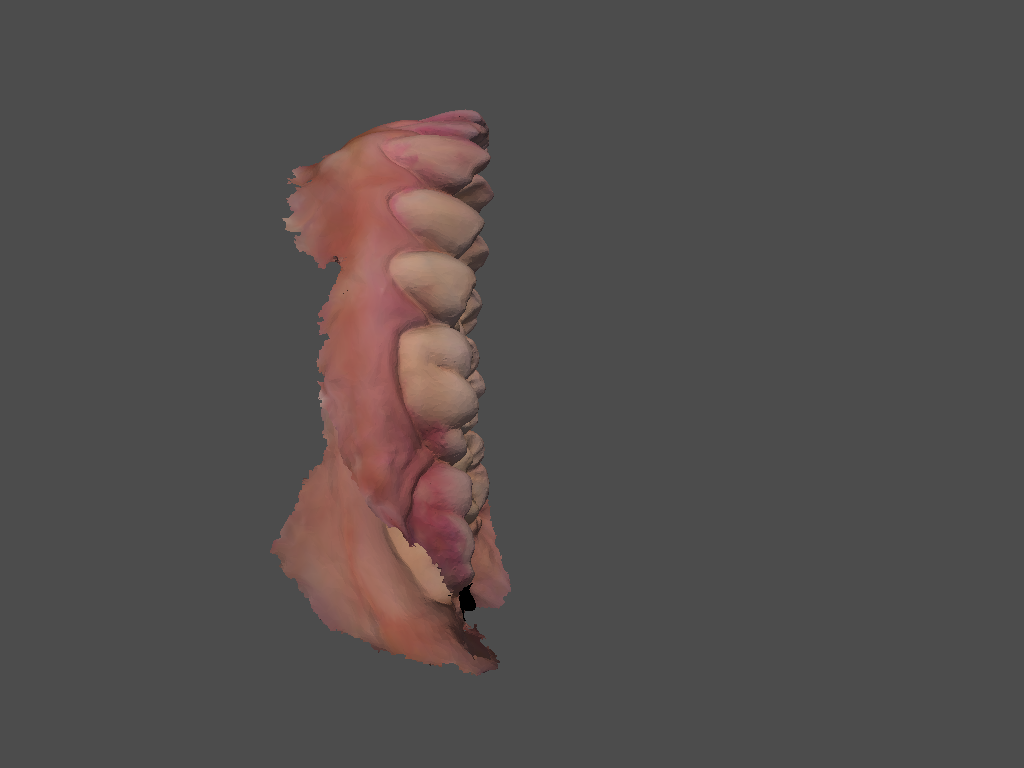

e:\anaconda3\envs\DPS_env\lib\site-packages\pyvista\jupyter\notebook.py:59: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  f'Failed to use notebook backend: \n\n{e}\n\nFalling back to a static output.'


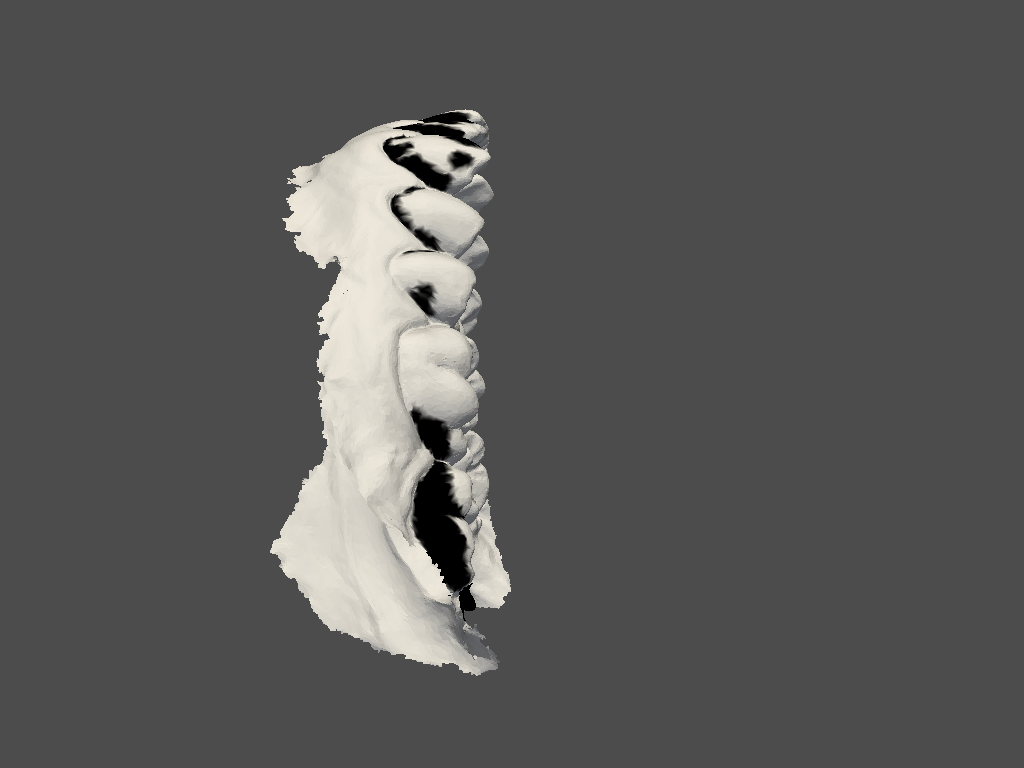

In [9]:
# Project the mesh to 2D images and save the images
for view in views:
    original_image, mask_image = project_and_save_images(origin_mesh, label_mesh, cameras[view], vrgb_origin, vrgb_label, view)
    cv2.imshow(f'{view} Original View', original_image)
    cv2.imshow(f'{view} Mask View', mask_image)

In [10]:
cv2.waitKey(0)
cv2.destroyAllWindows()

# Stop the virtual frame buffer
vdisplay.stop()

NameError: name 'vdisplay' is not defined